In [1]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [2]:
def xgb_model(best_v1, best_v2, best_v3, best_v4):
    
    # 特征根据品牌不同调整
    model_data = feature_data.loc[:,["a3","B16","B17","购买意愿"]] 
    model_data_y = model_data['购买意愿']
    model_data_x = model_data.drop('购买意愿', axis=1)
    X_train ,X_test ,y_train, y_test = train_test_split(model_data_x, model_data_y, test_size = 0.2, random_state = 20)
    model = xgb.XGBClassifier(n_estimators = best_v1, eta = best_v2, max_depth = best_v3, min_child_weight = best_v4,
                              objective="multi:softmax", num_class=2, use_label_encoder = False)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    roc_auc_score = metrics.roc_auc_score(y_test,y_pred)
    accuracy_score = accuracy_score(y_test,y_pred)
    recall_score = recall_score(y_test,y_pred)
    f1_score = f1_score(y_test,y_pred)
    
    print("roc_auc_score:%.2f%%"%(roc_auc_score*100.0))
    print("accuracy_score:%.2f%%"%(accuracy_score*100.0))
    print("recall_score:%.2f%%"%(recall_score*100.0))
    print("f1_score:%.2f%%"%(f1_score*100.0))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

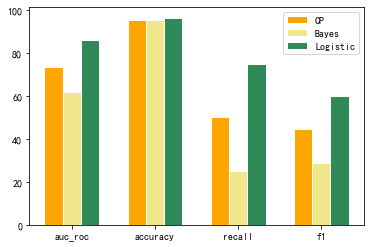

In [3]:
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False  
barWidth = 0.22

# 根据模型评分输入数据
bars1 = [73.57,95.41,50,44.44]
bars2 = [61.55,95.41,25,28.57]
bars3 = [86.07,96.33,75,60]

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
plt.bar(r1, bars1, color='orange', width=barWidth, edgecolor='white', label='CP')
plt.bar(r2, bars2, color='khaki', width=barWidth, edgecolor='white', label='Bayes')
plt.bar(r3, bars3, color = "seagreen", width=barWidth, edgecolor="white", label="Logistic")
plt.xticks([r + barWidth for r in range(len(bars1))], ["auc_roc","accuracy","recall","f1"])
plt.legend()
plt.savefig("score_compare.jpg",dpi=300)
plt.show()